In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv("Logistic_X_Train.csv").values
y = pd.read_csv("Logistic_Y_Train.csv").values

print(X.shape , y.shape)

(3000, 3) (3000, 1)


In [3]:
u = np.mean(X , axis=0)
print(u)

std = np.std(X , axis=0)
print(std)

X = (X-u)/std

[0.00745338 0.99928635 0.02948714]
[1.33391527 1.02368243 1.20935638]


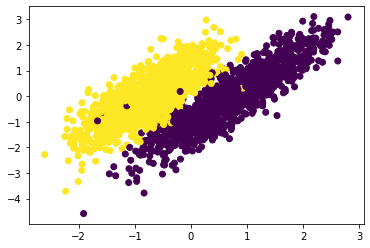

In [4]:
plt.scatter(X[:, 0] , X[:, 1] , c=y.reshape((-1, )))
plt.show()

In [5]:
ones = np.ones((X.shape[0], 1))
x_train = np.hstack((ones , X))
print(x_train.shape)

(3000, 4)


In [6]:
y_train = y.reshape((-1,1))
print(y_train.shape)

(3000, 1)


In [7]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def hypothesis(X , theta):
    
    z = np.dot(X , theta)
    return sigmoid(z)

def error(X ,  y , theta):
    
    hxi = hypothesis(X , theta)
    e = -1*np.mean((y*np.log(hxi) + ((1-y)*np.log(1-hxi))))
    return e

def gradient(X , y , theta):
    
    hxi = hypothesis(X , theta)
    grad = -1*np.dot(X.T , (y - hxi))
    return grad/X.shape[0]

def gradient_descent(X , y , lr = 0.1 , max_iters = 500):
    
    theta = np.zeros((X.shape[1], 1))
    error_list = []
    
    for i in range(max_iters):
        err = error(X , y , theta)
        error_list.append(err)
        
        grad = gradient(X , y , theta)
        theta = theta - lr*grad
        
    return theta , error_list
    

In [8]:
theta , error_list = gradient_descent(x_train , y_train)

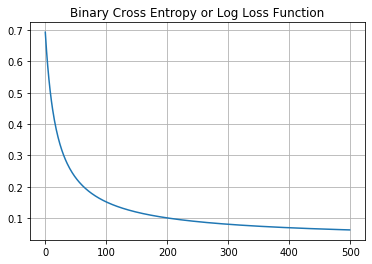

In [9]:
plt.plot(error_list)
plt.title('Binary Cross Entropy or Log Loss Function')
plt.grid()
plt.show()

In [10]:
theta

array([[-0.34767648],
       [-2.54073799],
       [ 1.38266256],
       [-2.30256859]])

In [11]:
def predict(X , theta):
    
    h = hypothesis(X , theta)
    
    output = np.zeros(h.shape)
    
    output[h>=0.5] = 1
    output = output.astype('int')
    
    return output
    

In [12]:
predict(x_train , theta)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [13]:
x_test = pd.read_csv("Logistic_X_Test.csv")
x_test.shape

(1000, 3)

In [14]:
x_test = (x_test-u)/std

In [15]:
ones = np.ones((x_test.shape[0], 1))

x_test = np.hstack((ones , x_test))
print(x_test.shape)

(1000, 4)


In [16]:
y_pred = predict(x_test , theta)

In [17]:
y_pred.shape

(1000, 1)

In [18]:
df = pd.DataFrame(y_pred , columns = ['label'])

In [19]:
df.head(3)

,label
0,1
1,1
2,0


In [20]:
df.to_csv("predictions.csv" , index = False)